**Exercise - 1:**

Read the image using the Pillow library and display it.

In [2]:
pip install pillow

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

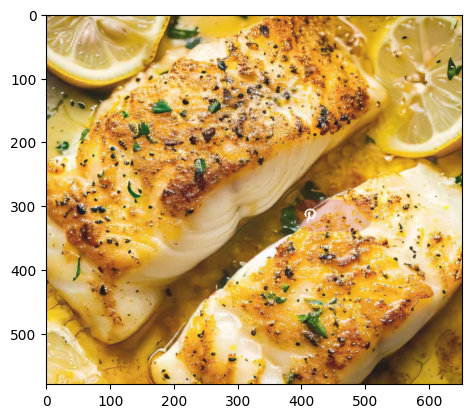

In [4]:
image_colored = Image.open("/content/drive/MyDrive/workshop1image.png")
plt.imshow(image_colored)

Display only the top left corner of 100x100 pixels.

 Shape of the image array : (580, 652, 4)


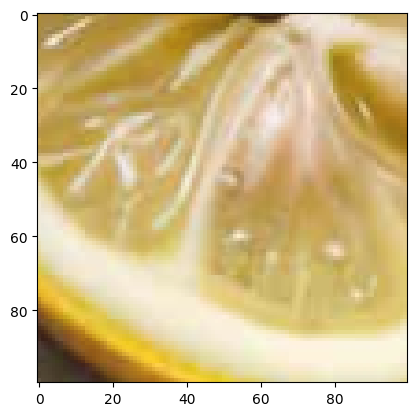

In [5]:
image_array_colored = np.array ( image_colored )
print (" Shape of the image array :", image_array_colored.shape )

row_column_100 = image_array_colored [:100 , :100]
plt.imshow(row_column_100)

Show the three color channels(R, G, B).

[[171 169 169 ... 197 189 188]
 [171 169 169 ... 204 197 194]
 [170 169 169 ... 211 203 200]
 ...
 [241 244 245 ... 151 158 137]
 [240 244 245 ... 155 167 120]
 [241 244 244 ... 154 118 119]]


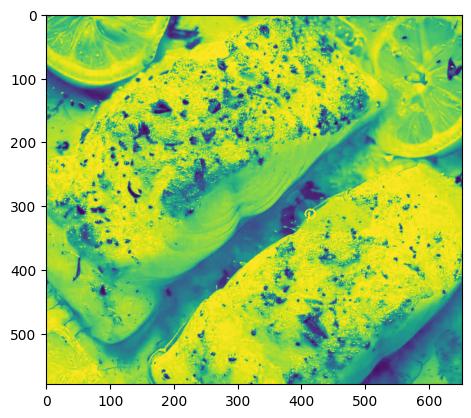

In [6]:
red_channel = image_array_colored [: , : , 0]
print( red_channel )
plt.imshow( red_channel )

[[139 135 134 ... 152 145 142]
 [139 136 136 ... 160 153 150]
 [139 138 137 ... 167 160 158]
 ...
 [213 216 215 ... 109 118  99]
 [214 217 217 ... 112 128  83]
 [217 218 218 ... 114  80  84]]


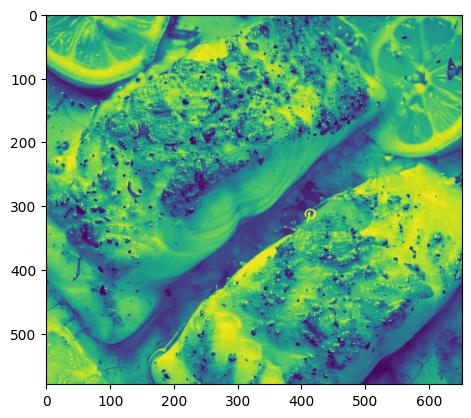

In [7]:
green_channel = image_array_colored [: , : , 1]
print( green_channel )
plt.imshow( green_channel )

[[ 61  62  65 ...  23  24  28]
 [ 59  63  66 ...  30  27  27]
 [ 59  65  69 ...  39  30  28]
 ...
 [136 135 134 ...  36  59  51]
 [129 129 129 ...  42  79  48]
 [125 126 126 ...  48  40  60]]


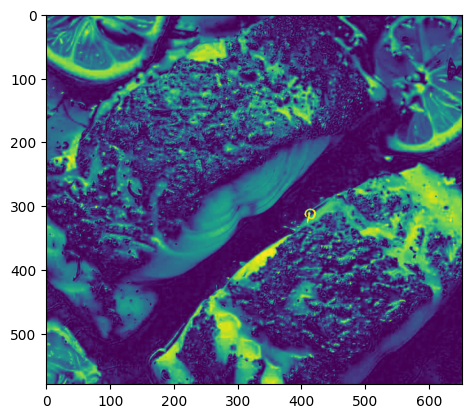

In [8]:
blue_channel = image_array_colored [: , : , 2]
print( blue_channel )
plt.imshow( blue_channel )

Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

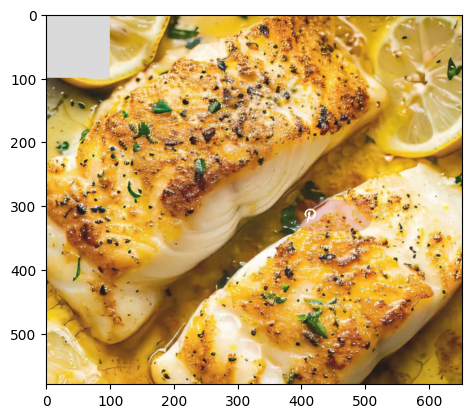

In [9]:
image_array_colored [:100 , :100] = 210

plt.imshow(image_array_colored)

**Exercise-2**

Load and display a grayscale image.

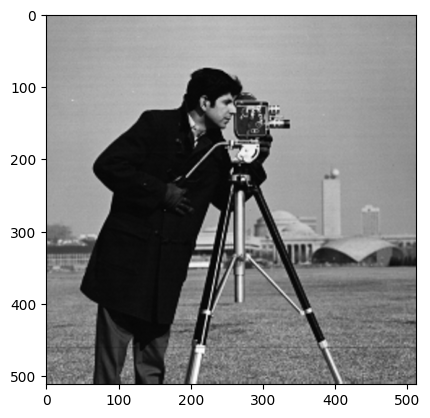

In [10]:
grey_image = Image.open("/content/drive/MyDrive/cameraman.png")
plt.imshow(grey_image, cmap="gray")

Extract and display the middle section of the image

 Shape of the image array : (512, 512)


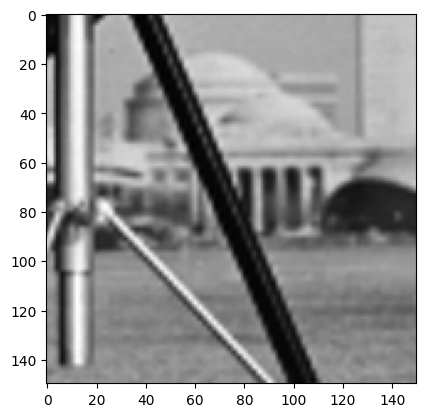

In [11]:
grey_image_array = np.array ( grey_image )
array_shape = grey_image_array.shape
rows, columns = array_shape
row_length = int(rows//2)
column_length = int(columns//2)
print (" Shape of the image array :",  array_shape)

image_center = grey_image_array [row_length:row_length+150 , column_length:column_length+150 ]
plt.imshow(image_center, cmap="gray")

Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

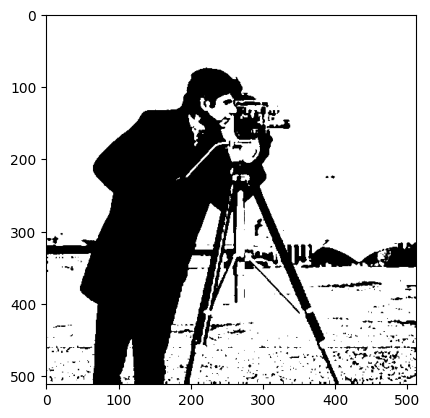

In [12]:
threshold_0 = np.where(grey_image_array<100, 0, grey_image_array)
threshold = np.where(threshold_0>100, 255, threshold_0)
plt.imshow(threshold, cmap="gray")

Rotate the image 90 degrees clockwise and display the result.

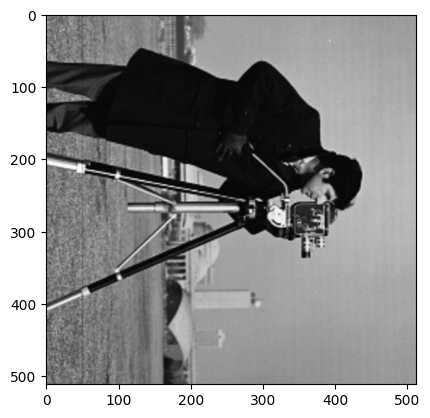

In [13]:
grey_image_rotate = grey_image.rotate(-90)
plt.imshow(grey_image_rotate, cmap="gray")

Convert the grayscale image to an RGB image.

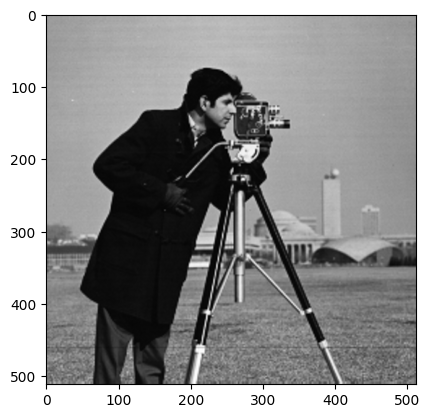

In [14]:
rgb_image = grey_image.convert('RGB')
plt.imshow(rgb_image)

**3 Image Compression and Decompression using PCA.**

Load and Prepare Data:

• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

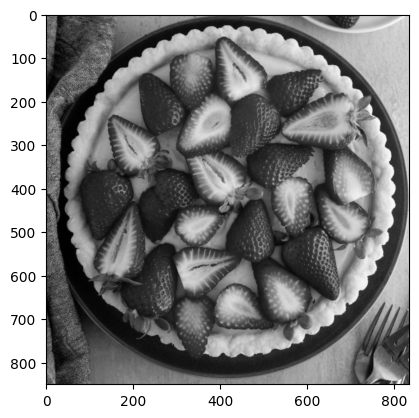

In [16]:
image = Image.open("/content/drive/MyDrive/AI/pie.png")
grayscale_image = image.convert("L")
plt.imshow(grayscale_image, cmap="gray")

In [23]:
image_array = np.array( grayscale_image )
height , width = image_array.shape
data = image_array.reshape ( height , width )

mean = np.mean ( data , axis =0)
centered_data = data - mean
print(centered_data)

[[  37.13647059   40.60588235    4.33176471 ...   48.09882353
    46.63294118   45.57294118]
 [ -13.86352941   14.60588235   60.33176471 ...   43.09882353
    42.63294118   42.57294118]
 [  35.13647059   22.60588235   46.33176471 ...   44.09882353
    42.63294118   41.57294118]
 ...
 [   0.13647059  -30.39411765   -4.66823529 ... -119.90117647
  -114.36705882 -110.42705882]
 [  41.13647059   -1.39411765   14.33176471 ... -122.90117647
  -114.36705882 -107.42705882]
 [  52.13647059    6.60588235   56.33176471 ... -122.90117647
  -118.36705882 -110.42705882]]


In [20]:
cov_matrix = np.cov ( centered_data , rowvar = False )
print(cov_matrix)

[[1409.3382443   989.33771219  656.27504746 ...   -3.20431511
    10.33165939   59.72737199]
 [ 989.33771219 1444.78795122  905.6385644  ...  -38.17773159
   -23.72080649   16.29321   ]
 [ 656.27504746  905.6385644  1652.59887203 ...   95.12500797
   116.74854015  162.68601954]
 ...
 [  -3.20431511  -38.17773159   95.12500797 ... 2866.74876187
  2766.67000346 2643.36263008]
 [  10.33165939  -23.72080649  116.74854015 ... 2766.67000346
  2728.16664034 2632.97262385]
 [  59.72737199   16.29321     162.68601954 ... 2643.36263008
  2632.97262385 2603.91752373]]


**Eigen Decomposition and Identifying Principal Components:**

• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

In [26]:
eigenvalues, eigenvectors = np.linalg.eigh ( cov_matrix )

In [27]:
sorted_indices = np.argsort ( eigenvalues )[:: -1]
eigenvalues = eigenvalues[ sorted_indices ]
eigenvectors = eigenvectors[: , sorted_indices ]

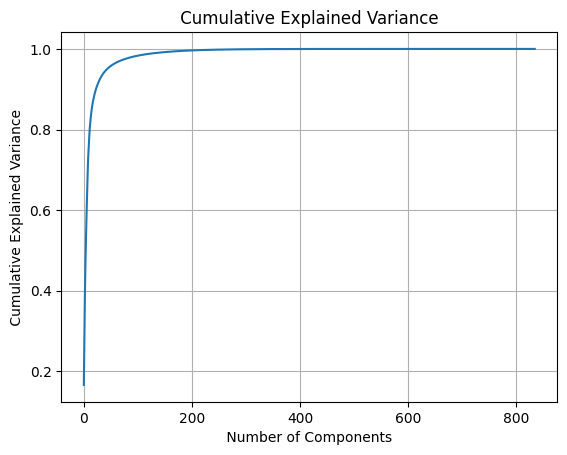

In [28]:
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt.plot( np . cumsum ( explained_variance_ratio ) )
plt.title(" Cumulative Explained Variance ")
plt.xlabel(" Number of Components ")
plt.ylabel(" Cumulative Explained Variance ")
plt.grid( True )
plt.show()

In [30]:
k = 50
components = eigenvectors [: , : k ]
print(components)

[[-0.01079694  0.00257368 -0.02037893 ...  0.03603963  0.03254737
   0.10681027]
 [-0.00954251  0.00468738 -0.01609102 ...  0.00756399 -0.01227732
   0.04453656]
 [-0.01459622  0.0048356  -0.01935591 ... -0.02739587 -0.02669836
   0.02586616]
 ...
 [-0.02006341 -0.01452128 -0.00994344 ... -0.01044749  0.00905369
   0.05888499]
 [-0.01984731 -0.01632886 -0.00962392 ... -0.00608057  0.00680785
   0.05655823]
 [-0.0197096  -0.01766812 -0.01014186 ... -0.00584844  0.02513478
   0.06255638]]


**Reconstruction and Experiment:**

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

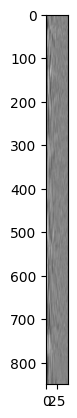

In [37]:
compressed_data = np.dot ( centered_data, components )
plt.imshow( compressed_data , cmap = "gray")

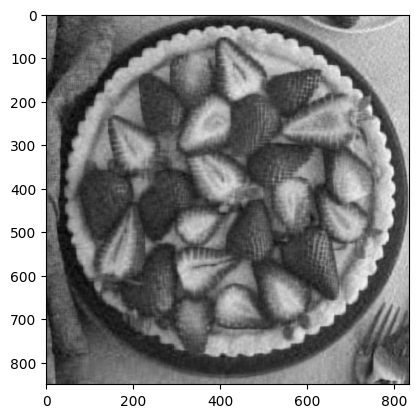

In [35]:
decompressed_data = np.dot ( compressed_data , components . T ) + mean
plt.imshow( decompressed_data , cmap = "gray")